Warning message in read.table("county_complete2.csv", sep = ",", header = TRUE):
“incomplete final line found by readTableHeader on 'county_complete2.csv'”

pop_2019,poverty_under_18_2019,updated
659680,22.8,15040704
293531,13.1,3845256
4328810,19.8,85710438
392967,25.1,9863472
10081570,20.8,209696656
705576,18.2,12841483
943926,11.0,10383186
556165,15.5,8620558
2699428,23.0,62086844
1036200,21.5,22278300


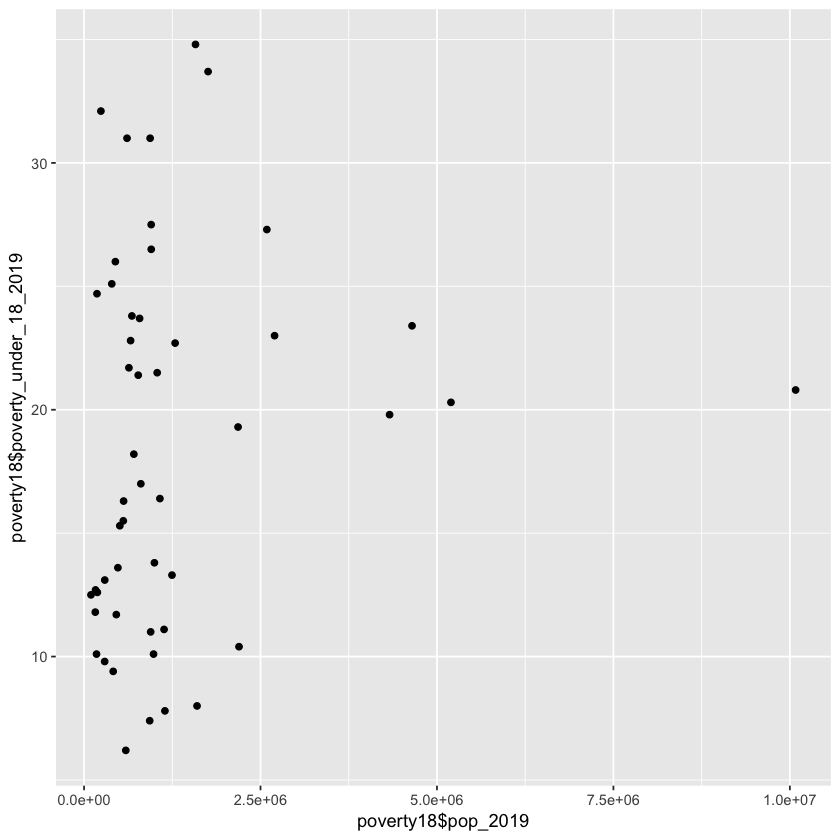

In [31]:
library(dplyr)
library(tidyr)
library(ggplot2)

county = read.table("county_complete1.csv", sep = ",", header = TRUE)

States = c('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
      'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
      'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
      'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
      'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming')


pop19 = c()
by_county = c()
table = data.frame(read.table("county_complete2.csv", sep = ",", header = TRUE))

for (s in States){
    state = filter(county, state == s)
   
    state2019 = state[!is.na(state$pop_2019), ]
    mX = max(state2019$pop_2019)
    by_county = data.frame(filter(county, pop_2019 == mX))
    pop19 <- rbind(pop19, by_county)
}

pop19 <- rbind(pop19, table)
pop19 = arrange(pop19, state)
# pop19








poverty18 = select(pop19, c('pop_2019', 'poverty_under_18_2019'))
# sel = select(pop19, state, median_household_income_2019, pop_2019)
poverty18$updated = poverty18$pop_2019 * poverty18$poverty_under_18_2019
poverty18
ggplot(poverty18, aes(poverty18$pop_2019, poverty18$poverty_under_18_2019)) + 
  geom_point()
